# Example of notebook to perform analysis of data
This notebook describes step by step the analysis of the grades

Set some options for the notebook. We can ignore these options for now.

In [41]:
%matplotlib inline

## Import the tools needed
Import tool called "pandas". "pandas" will read grades into notebook and perform the analysis on the grades

In [1]:
import pandas

Set the maximum amount of rows of a "pandas" object to be printed to screen

In [26]:
pandas.set_option( 'display.max_rows' , 10 )

Set the maximum amount of decimals to print out.

In [93]:
pandas.set_option( 'precision' , 0 )

Import tool called "numpy" that we use to draw from normal distribution.

In [76]:
import numpy

Import tool called "matplotlib" that we use to plot data.

In [73]:
import matplotlib
import matplotlib.pyplot as plt

Set style of plots in notebook.

In [74]:
matplotlib.style.use('ggplot')

## Read the grades into notebook
To do this we use "pandas" tool that we imported in the previous section.  
pandas.read_table is a function within the "pandas" tool that reads the grades from the grades.txt file into the notebook.  
You can read the documentation of the pandas.read_table function at this web page: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html#pandas.read_table

In [85]:
grades = pandas.read_table( filepath_or_buffer = 'grades.txt' , delim_whitespace = True , header = None , index_col = False , usecols = [0] , squeeze = True )
grades_1 = pandas.read_table( filepath_or_buffer = 'grades.txt' , delim_whitespace = True , header = None , index_col = False , usecols = [1] , squeeze = True )
grades = grades.append(grades_1 , ignore_index = True)

Now the "grades" object in the notebook contains the grades.  
We can now print the grades to the screen in the notebook as we do below.

In [86]:
grades

0      1
1      1
2      1
3      2
4      3
      ..
47    19
48    19
49    20
50    20
51    20
dtype: int64

In the printout above of the grades we see two columns of data.
- The one on the left is the index of the grades.
- The one on the right contains the actual grades.

The two dots we see in the middle of the printout stand for skipped rows.

## Analysis of grades
We can now do analysis of the data just read into the notebook.

### Mean of grades
We store into mu object the mean of the data.  
We then print the mean of the data rounded to two decimals.

In [39]:
mu = grades.mean()
'%.2f' % round( mu , 2 )

'13.31'

### Standard deviation of grades
We store into sd object the standard deviation of the data.  
We then print the standard deviationof the data rounded to two decimals.

In [75]:
sd = grades.std()
'%.2f' % round( sd , 2 )

'5.53'

### Histogram of grades
We plot the histogram of the grades.

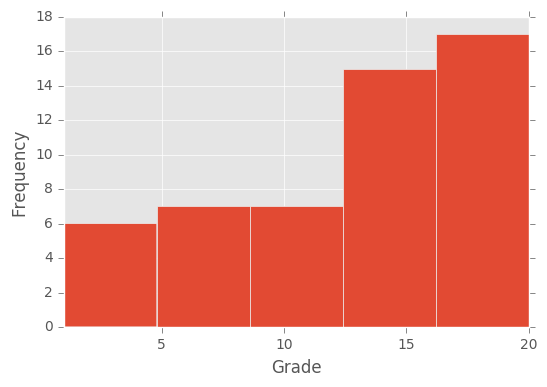

In [98]:
grades.hist( bins = 5 )
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.axis([1,20,0,18]);

We can see from the histogram above, that the grades do not appear to be normally distributed.

### Boxplot of grades
We plot the boxplot of the grades.

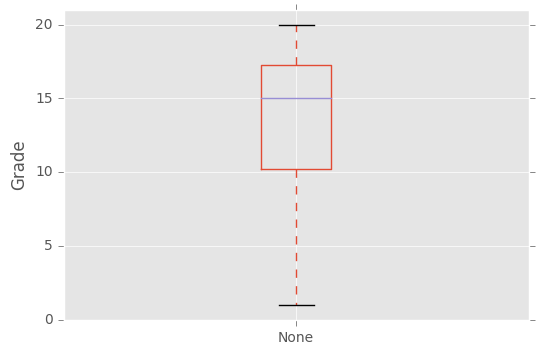

In [89]:
grades.plot.box()
plt.ylabel('Grade')
plt.axis([None,None,0,21]);

From the boxplot above, we see that there is asymmetry in the distribution.

## Normal distribution of grades
Let's see what a normal distribution of grades would look like when plotted as histogram.

### Draw random grades from normal distribution
We use the same mean and standard deviation that we calculated in the Analysis section
Drawn grades above 20 are set equal to 20. Drawn grades below 1 are set equal to 1.

In [116]:
numpy.random.seed(0)
norm_grades = pandas.Series(numpy.clip(numpy.random.normal(mu,sd,grades.count()*10),1,20)).apply(numpy.around)

Print out the drawn grades.

In [117]:
norm_grades

0      20
1      16
2      19
3      20
4      20
       ..
515    14
516    16
517    19
518    15
519    20
dtype: float64

### Plot the histogram of the drawn grades

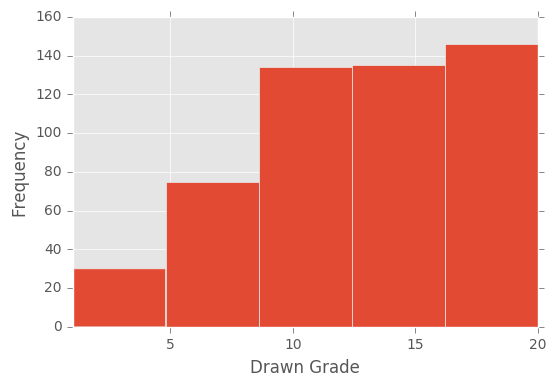

In [119]:
norm_grades.hist( bins = 5 )
plt.xlabel('Drawn Grade')
plt.ylabel('Frequency')
plt.axis([1,20,0,None]);

### Plot the boxplot of the drawn grades

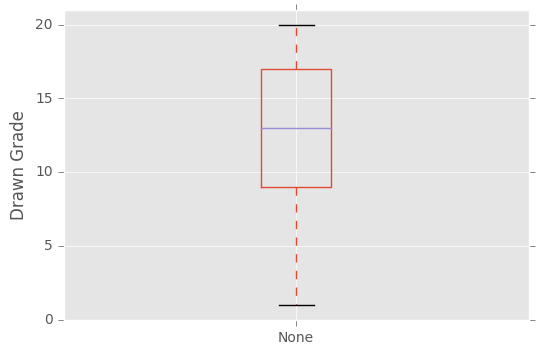

In [120]:
norm_grades.plot.box()
plt.ylabel('Drawn Grade')
plt.axis([None,None,0,21]);

We can see by comparing the two boxplots, that the medians are very different.  
To verify this we print out the medians of the actual grades and of the drawn grades from the normal distribution.

In [122]:
'%.2f' % round( grades.median(), 2 )

'15.00'

In [123]:
'%.2f' % round( norm_grades.median(), 2 )

'13.00'